# Code with visualization of the 6 features from the images
Build: 20171108 
Updates: 20171206 for comments 


Variable names: 



In [2]:
import keras
import pandas as pd
import numpy as np

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

Using TensorFlow backend.


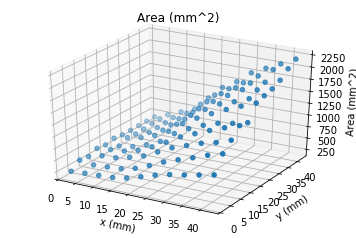

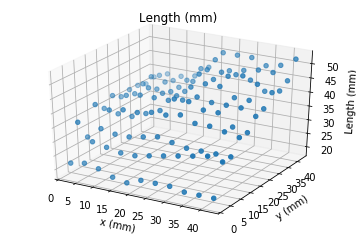

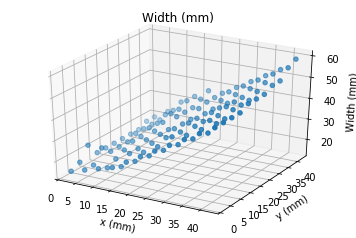

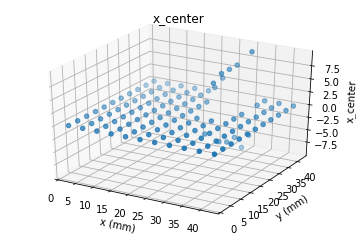

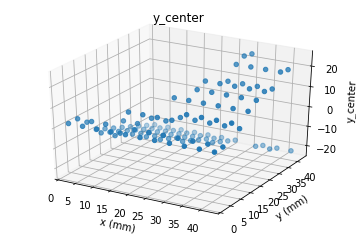

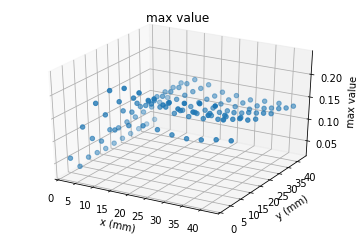

In [3]:
df = pd.read_csv('sumValuesThrhPer20.csv')
dfX = df[['x (mm)','y (mm)']]

dfY = df[["Area (mm^2)","Length (mm)","Width (mm)","x_center","y_center","max value"]]

X=dfX.values
Y=dfY.values


import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def zeplot(dfX,dfY,titlename):
    threedee = plt.figure().gca(projection='3d')
    plt.title(titlename)
    threedee.scatter(dfX[['x (mm)']], dfX[['y (mm)']],dfY[[titlename]])
    threedee.set_xlabel('x (mm)')
    threedee.set_ylabel('y (mm)')
    threedee.set_zlabel(titlename)
    plt.show()


for iy in range(len(dfY.columns)):
    zeplot(dfX,dfY,dfY.columns[iy])    

    


In [4]:
from sklearn.model_selection import cross_val_score, train_test_split
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier

# select the first three attributes of the thresholded image: area, width, length 
Y3 = Y[:,0:3]


X_train, X_test, Y3_train, Y3_test = train_test_split(X, Y3, test_size=0.4, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y3_train.shape)
print(Y3_test.shape)


(72, 2)
(49, 2)
(72, 3)
(49, 3)


In [5]:
def create_model():
    #model = Sequential()
    #16 feature inputs (votes) going into an 32-unit layer 
    #model.add(Dense(32, input_dim=16, kernel_initializer='normal', activation='relu'))
    # Another hidden layer of 16 units
    #model.add(Dense(16, kernel_initializer='normal', activation='relu'))
    # Output layer with a binary classification (Democrat or Republican political party)
    #model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    #model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    model = Sequential()
    model.add(Dense(30, activation='relu', input_shape=(2,)))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(500, activation='relu'))
    model.add(Dense(250, activation='relu'))
    # model.add(Dense(3, activation='relu'))
    #model.add(Dense(3, activation='relu'))
    #model.add(Dense(3, activation='relu'))
    model.add(Dense(3))
    return model

In [6]:
#estimator = KerasClassifier(build_fn=create_model, nb_epoch=11, verbose=0)

In [7]:
model = create_model()
model.compile(loss='mse',
              optimizer=RMSprop(),
              metrics=['accuracy'])


history = model.fit(X_train, Y3_train,
                    batch_size=12,
                    epochs=6,
                    verbose=0,
                    validation_data=(X_test, Y3_test))
                    #validation_data=(X_train, Y3_train))

In [8]:
#indexnumber = 1
for irad in range(6):
    indexnumber = irad*4
    #print('index number is =', indexnumber)
    print('width and length = ', X_test[indexnumber,:].reshape(1,-1) )
    
    print('predicted = ', model.predict(X_test[indexnumber,:].reshape(1,-1) ))
    print('labeled = ', Y3_test[indexnumber,:])
    print('Ratio = ', model.predict(X_test[indexnumber,:].reshape(1,-1) )/Y3_test[indexnumber,:])

    

width and length =  [[18 18]]
predicted =  [[ 818.42651367   21.3539772    22.70594978]]
labeled =  [ 716.   38.   29.]
Ratio =  [[ 1.14305379  0.56194677  0.78296379]]
width and length =  [[34 38]]
predicted =  [[ 1606.27502441    42.06739426    44.30508041]]
labeled =  [ 1832.    48.    49.]
Ratio =  [[ 0.87678768  0.87640405  0.90418531]]
width and length =  [[18  6]]
predicted =  [[ 614.43902588   15.44836235   17.65761757]]
labeled =  [ 455.   27.   23.]
Ratio =  [[ 1.35041544  0.57216157  0.7677225 ]]
width and length =  [[ 2 10]]
predicted =  [[ 244.72879028    6.48402119    6.42232418]]
labeled =  [ 358.   28.   23.]
Ratio =  [[ 0.68359997  0.23157219  0.27923149]]
width and length =  [[10 34]]
predicted =  [[ 907.26873779   23.98412132   24.02380562]]
labeled =  [ 606.   40.   27.]
Ratio =  [[ 1.49714313  0.59960303  0.88977058]]
width and length =  [[22 34]]
predicted =  [[ 1210.06286621    31.89080238    32.92615128]]
labeled =  [ 1224.    47.    37.]
Ratio =  [[ 0.98861345 

In [9]:
############## Multivariate Regression
#import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

#Xnorm= scale.fit_transform(X)
#Y3norm= scale.fit_transform(Y3)
#Xnorm= X
Y3norm = Y3

dfXnorm = dfX.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
Xnorm=dfXnorm.values

Xnorm_train, Xnorm_test, Y3norm_train, Y3norm_test = train_test_split(Xnorm, Y3norm, test_size=0.4, random_state=0)
print(Xnorm_train.shape)
print(Xnorm_test.shape)
print(Y3norm_train.shape)
print(Y3norm_test.shape)

#Xnorm_train

/usr/local/lib/python3.5/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


NameError: name 'Xnorm' is not defined

In [12]:
model = create_model()
model.compile(loss='mse',
              optimizer=RMSprop(),
              metrics=['accuracy'])
#mse
#categorical_crossentropy
history = model.fit(Xnorm_train, Y3norm_train,
                    batch_size=12,
                    epochs=6,
                    verbose=0,
                    validation_data=(Xnorm_test, Y3norm_test))

#model.score(X_test, Y3_test) 



NameError: name 'Xnorm_train' is not defined

In [13]:
 #indexnumber = 1
for irad in range(6):
    indexnumber = irad*4
    #print('index number is =', indexnumber)
    print('width and length = ', Xnorm_test[indexnumber,:].reshape(1,-1) )
    
    print('predicted = ', model.predict(Xnorm_test[indexnumber,:].reshape(1,-1) ))
    print('labeled = ', Y3norm_test[indexnumber,:])
    print('Ratio = ', model.predict(Xnorm_test[indexnumber,:].reshape(1,-1) )/Y3norm_test[indexnumber,:])
    

NameError: name 'Xnorm_test' is not defined